Primer preuzet sa [sklearn zvanicnog sajta](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

Parametar `n_colors` oznacava broj klastera koje ce algoritam traziti, a ujedno i oznacava broj boja koje ce biti koriscene u kompresovanoj slici.

In [2]:

n_colors = 2

# Ucitavamo sliku
china = load_sample_image("china.jpg")

Normalizujemo piksele.

In [3]:
china = np.array(china, dtype=np.float64) / 255

Transformisemo sliku u dvodimenzioni vektor.

In [4]:
w, h, d = original_shape = china.shape
assert d == 3
image_array = np.reshape(china, (w * h, d))

In [5]:
print('original_shape: ', original_shape)
print(f'{w}x{h} d={d}')
print(china.shape)
print(f'image_array.shape={image_array.shape}')

original_shape:  (427, 640, 3)
427x640 d=3
(427, 640, 3)
image_array.shape=(273280, 3)


Trazimo klastere na podskupu podataka.

In [6]:
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

done in 0.033s.


Koristimo dobijeni model da dobijemo vrednost klastera za svaki piksel.

In [7]:
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

done in 0.045s.


In [8]:
labels.shape

(273280,)

Predicting color indices on the full image (random)
done in 0.023s.


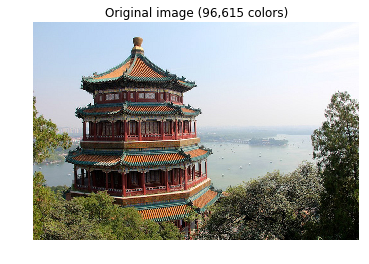

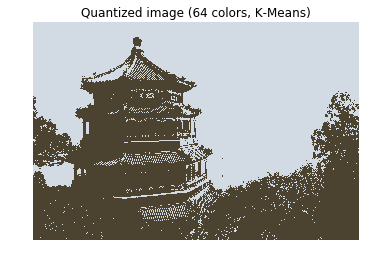

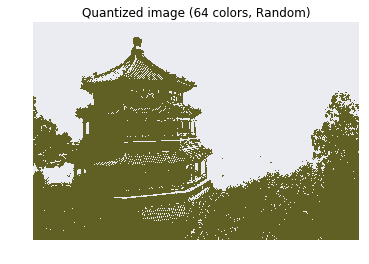

In [9]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()